## LabelEncoder 可能會引入不必要的順序關係

## LabelEncoder 

#### 將類別標籤轉換為數字編碼，適用於有順序關係的類別變數。

In [2]:
import pandas as pd
data = pd.DataFrame({
    'Fruits': ['Apple', 'Banana', 'Cherry', 'Kewi'],
})
fruit_map = {"Apple":1,"Banana":2,"Cherry":3,"Kewi":4}
print(data)
data["Fruits_Numeric"] = data["Fruits"].apply(lambda x: fruit_map[x])
print(data)

   Fruits
0   Apple
1  Banana
2  Cherry
3    Kewi
   Fruits  Fruits_Numeric
0   Apple               1
1  Banana               2
2  Cherry               3
3    Kewi               4


In [8]:
#使用字典序排列
from sklearn.preprocessing import LabelEncoder
data = pd.DataFrame({
    'Fruits': ['Cherry','Banana', 'Apple', 'Kewi'],
})
le = LabelEncoder()
data["Fruits_Label"] = le.fit_transform(data["Fruits"])
data

,Fruits,Fruits_Label
0,Cherry,2
1,Banana,1
2,Apple,0
3,Kewi,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
data = pd.DataFrame({
    '學歷': ['高中', '大學', '研究所', '博士'],
})
le = LabelEncoder()
data["學歷_Label"] = le.fit_transform(data["學歷"])
data

In [23]:
### 手動標籤編碼
import pandas as pd
# 建立一個範例 DataFrame
data = pd.DataFrame({
    '學歷': ['高中', '大學', '研究所', '博士',"高中","博士"]
})
order = ['高中', '大學', '研究所', '博士']
# mapDic2 = dict()
# for idx,level  in  enumerate(order):
#     #print(level,":",idx)
#     mapDic2[level] = idx
# print(mapDic2)

mapDic = {level:idx for idx,level in enumerate(order)}
print(mapDic)
data["學歷_label"] = data["學歷"].map(mapDic)
print(data)

{'高中': 0, '大學': 1, '研究所': 2, '博士': 3}
    學歷  學歷_label
0   高中         0
1   大學         1
2  研究所         2
3   博士         3
4   高中         0
5   博士         3


## OneHotEncoder

In [45]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# 建立一個範例 DataFrame
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})
ohe =  OneHotEncoder(sparse_output=False)
one_hot_code = ohe.fit_transform(data[["Color"]])
print(one_hot_code)
colName =ohe.get_feature_names_out(["Color"])
print(colName)
one_hot_df = pd.DataFrame(one_hot_code,columns=colName)
print(one_hot_df)
data = data.join(one_hot_df)
print(data)
# ohe2 =  OneHotEncoder(sparse_output=False)
# one_hot_code2 = ohe2.fit_transform(data[["Color"]])
# print(one_hot_code2)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
['Color_Blue' 'Color_Green' 'Color_Red']
   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         0.0          1.0        0.0
2         1.0          0.0        0.0
3         0.0          1.0        0.0
4         0.0          0.0        1.0
   Color  Color_Blue  Color_Green  Color_Red
0    Red         0.0          0.0        1.0
1  Green         0.0          1.0        0.0
2   Blue         1.0          0.0        0.0
3  Green         0.0          1.0        0.0
4    Red         0.0          0.0        1.0


In [49]:
import pandas as pd

# 建立一個範例 DataFrame
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})

one_hot_df =  pd.get_dummies(data,columns=["Color"])
one_hot_df = one_hot_df.astype(int)
print(one_hot_df)


   Color_Blue  Color_Green  Color_Red
0           0            0          1
1           0            1          0
2           1            0          0
3           0            1          0
4           0            0          1


## 共線(Collinearity)

In [52]:
import pandas as pd

# 建立一個範例 DataFrame
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})
ohe =  OneHotEncoder(sparse_output=False,drop="first")
one_hot_code =  ohe.fit_transform(data[["Color"]])
print(one_hot_code)

[[0. 1.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]]


In [54]:
import pandas as pd

# 建立一個範例 DataFrame
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})
one_hot_df =  pd.get_dummies(data,columns=["Color"],drop_first=True)
print(one_hot_df)

   Color_Green  Color_Red
0        False       True
1         True      False
2        False      False
3         True      False
4        False       True


# Dealing with Categorical Data one-hot”編碼案例2

在數據分析和機器學習中，數據類型可以大致分為以下幾種，每種都有其特定的用途和處理方式：

1. **類別數據（Categorical Data）**
   - **說明**：表示不同類別或群組的數據，通常是非數值的。
   - **案例**：性別（男、女）、血型（A、B、AB、O）、產品類型（家具、電子產品、服裝）。

2. **數值數據（Numerical Data）**
   - 分為兩種：
     - **連續數據（Continuous Data）**
       - **說明**：可以在一定範圍內任意細分的數據。
       - **案例**：身高、體重、溫度、股票價格。
     - **離散數據（Discrete Data）**
       - **說明**：具體的整數值，不可以細分。
       - **案例**：班上學生人數、公司員工數、一天中的客戶服務電話次數。

3. **時間數據（Time Series Data）**
   - **說明**：按時間順序排列的數據點序列，通常每個數據點都有一個時間戳。
   - **案例**：每日股市收盤價、每小時天氣記錄、月銷售數據。

4. **文字數據（Text Data）**
   - **說明**：由字、詞、句子構成的數據，通常需要特殊的處理方式如自然語言處理（NLP）。
   - **案例**：商品評論、新聞文章、社交媒體帖子。

5. **布爾數據（Boolean Data）**
   - **說明**：表示是或否的二元數據。
   - **案例**：是否已婚（是、否）、是否訂閱電子報（是、否）。

6. **序列數據（Ordinal Data）**
   - **說明**：類別數據的一種，但類別之間存在自然排序或等級。
   - **案例**：滿意度調查（不滿意、一般、滿意、非常滿意）、教育程度（小學、中學、大學、研究生）。

這些數據類型在數據分析和機器學習中扮演著關鍵角色，根據數據的特性選擇適當的處理方式對於獲得有效的分析結果至關重要。

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv("Ames_NO_Missing_Data.csv")
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.000000,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.000000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,37.000000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2921,20,RL,75.144444,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2922,85,RL,62.000000,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2923,20,RL,77.000000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


當我們將類別數據以數字形式編碼時需要小心。我們需要確保數字之間的關係對模型來說是有意義的。例如，MSSubClass 的編碼本質上只是每個類別的數字代碼：

**MSSubClass: 住宅類型。**

- **20**	1-STOREY 1946 & NEWER ALL STYLES 一層樓 1946年及以後所有風格
- **30**	1-STOREY 1945 & OLDER 一層樓 1945年及更早
- **40**	1-STOREY W/FINISHED ATTIC ALL AGES 一層樓帶完成的閣樓 所有年齡
- **45**	1-1/2 STORY - UNFINISHED ALL AGES 一層半未完成 所有年齡
- **50**	1-1/2 STORY FINISHED ALL AGES 一層半完成 所有年齡
- **60**	2-STORY 1946 & NEWER 二層樓 1946年及以後
- **70**	2-STORY 1945 & OLDER 二層樓 1945年及更早
- **75**	2-1/2 STORY ALL AGES 二層半 所有年齡
- **80**	SPLIT OR MULTI-LEVEL 分割或多層
- **85**	SPLIT FOYER 分割門廳
- **90**	DUPLEX - ALL STYLES AND AGES 雙拼 - 所有風格和年齡
- **120**	1-STORY PUD (Planned Unit Development) - 1946 & NEWER 一層樓PUD（計劃單元開發）- 1946年及以後
- **150**	1-1/2 STORY PUD - ALL AGES 一層半PUD - 所有年齡
- **160**	2-STORY PUD - 1946 & NEWER 二層樓PUD - 1946年及以後
- **180**	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER PUD - 多層 - 包括分割層/門廳
- **190**	2 FAMILY CONVERSION - ALL STYLES AND AGES 兩家庭改造 - 所有風格和年齡

數字本身似乎並無與其他數字相關。雖然 30 > 20 是對的，但“1-STOREY 1945 & OLDER” > “1-STOREY 1946 & NEWER ALL STYLES”實際上並無意義。需要注意的是，這並不總是這樣，例如將頭等艙和二等艙編碼為 1 和 2 的情況。確保你完全理解你的數據集，以檢查需要轉換/更改的內容。

In [57]:
df["MS SubClass"] = df['MS SubClass'].apply(str)


In [67]:
df_nums =  df.select_dtypes(exclude="object")#排除物件類型
df_objs =  df.select_dtypes(include="object")#只保留物件類型
df_objs[["Land Slope"]]

,Land Slope
0,Gtl
1,Gtl
2,Gtl
3,Gtl
4,Gtl
...,...
2920,Gtl
2921,Mod
2922,Gtl
2923,Mod


In [59]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath     

In [60]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    1152 non-null   object
 18  Exter Qu

### Converting 開始轉換

In [63]:
df_objs =  pd.get_dummies(df_objs,drop_first=True)
print(df_objs.head())
df_objs = df_objs.astype(int)
print(df_objs)

   MS SubClass_150  MS SubClass_160  MS SubClass_180  MS SubClass_190  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   MS SubClass_20  MS SubClass_30  MS SubClass_40  MS SubClass_45  \
0            True           False           False           False   
1            True           False           False           False   
2            True           False           False           False   
3            True           False           False           False   
4           False           False           False           False   

   MS SubClass_50  MS SubClass_60  ...  Sale Type_ConLw  Sale Type_New  \
0           False           False  ...            False          False  

In [64]:
final_df= pd.concat([df_nums,df_objs],axis=1)

In [65]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0



### 1. 均方誤差（MSE, Mean Squared Error）
MSE 是所有預測值和實際值之間差異的平方和的平均值。公式如下：

$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$

其中：
- $( n )$ 是樣本數
- $( y_i )$ 是實際值
- $( \hat{y}_i )$ 是預測值

### 2. 均方根誤差（RMSE, Root Mean Squared Error）
RMSE 是 MSE 的平方根。公式如下：

$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$

### 3. 平均絕對誤差（MAE, Mean Absolute Error）
MAE 是所有預測值和實際值之間差異的絕對值的平均值。公式如下：

$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$

這些誤差指標用於評估回歸模型的性能。MSE 和 RMSE 更加敏感於大的誤差，因為它們對誤差進行平方。MAE 則提供了預測值和實際值之間差異的平均大小。


In [68]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [79]:
california = datasets.fetch_california_housing()
X = california.data
y = california.target
print(X)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [75]:
import pandas as pd
df =   pd.read_csv("california_housing.csv")
y = df["target"]
X = df.drop("target",axis=1)
print(X)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
model = LinearRegression()

In [78]:
model.fit(X_train,y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test,y_pred)

print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)

MSE: 0.5558915986952436
RMSE: 0.7455813830127759
MAE: 0.5332001304956563


## Cross Validation with cross_val_score 交叉驗證

<img src="grid_search_cross_validation.png">

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [100]:
from sklearn.model_selection import train_test_split
X = df.drop("sales",axis=1)
y = df["sales"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)


## 特徵縮放

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [97]:
from sklearn.linear_model import LinearRegression
mode = LinearRegression()


### 使用 `cross_val_score`

In [102]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(mode,X_train,y_train,scoring="neg_mean_squared_error",cv=5)

abs(score.mean()) 

3.3439092212046893

https://scikit-learn.org/stable/modules/model_evaluation.html

### 使用 `cross_validate` 進行交叉驗證


In [121]:
from sklearn.model_selection import cross_validate
score = cross_validate(mode,X_train,y_train,
                        scoring=['neg_mean_absolute_error','neg_mean_squared_error'],cv=5)

print(abs(score["test_neg_mean_squared_error"].mean()))
print(abs(score["test_neg_mean_absolute_error"].mean()))


3.3439092212046893
1.3201313509110701


In [122]:
mode.fit(X_train,y_train)
y_pred = mode.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)

2.2987166978863782
1.2137457736144803


### 網格搜索（Grid Search）


In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [126]:
X = df.drop("sales",axis=1)
y = df["sales"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=101)


In [125]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
from sklearn.linear_model import ElasticNet
elasticNetmodel = ElasticNet()

在ElasticNet模型中，`alpha`和`l1_ratio`是兩個關鍵的超參數，它們決定了模型的正則化程度和正則化方式。

### `alpha` 的意思

`alpha` 是正則化強度的參數，它控制正則化項的權重。`alpha` 值越大，正則化效果越強，這會對模型參數進行更大的懲罰。具體來說：

- **當 `alpha` = 0 時**：模型沒有正則化，這相當於普通的線性回歸。
- **當 `alpha` 增大時**：模型的正則化效果增強，這有助於防止過擬合，但可能會導致欠擬合。

### `l1_ratio` 的意思

`l1_ratio` 決定了 L1 正則化（Lasso）和 L2 正則化（Ridge）在總正則化項中的比例。具體來說：

- **當 `l1_ratio` = 0 時**：模型是純粹的 L2 正則化（Ridge 回歸）。
- **當 `l1_ratio` = 1 時**：模型是純粹的 L1 正則化（Lasso 回歸）。
- **當 `0 < l1_ratio < 1` 時**：模型是 L1 和 L2 正則化的組合（ElasticNet），`l1_ratio` 越大，L1 正則化的影響越大；`l1_ratio` 越小，L2 正則化的影響越大。

In [139]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
grid_model =  GridSearchCV(estimator=elasticNetmodel,
             param_grid=param_grid,
             scoring="neg_mean_squared_error",
             cv=5,
             verbose=2)#一共跑 6*7*5次
#verbose=2 意味著將顯示較為詳細的日誌訊息，這些訊息包括每次訓練每個超參數

In [142]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [143]:
grid_model.best_params_

{'alpha': 5, 'l1_ratio': 0.5}

In [144]:
y_pred =  grid_model.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.36971203446965

## 混淆矩陣(用在分類)

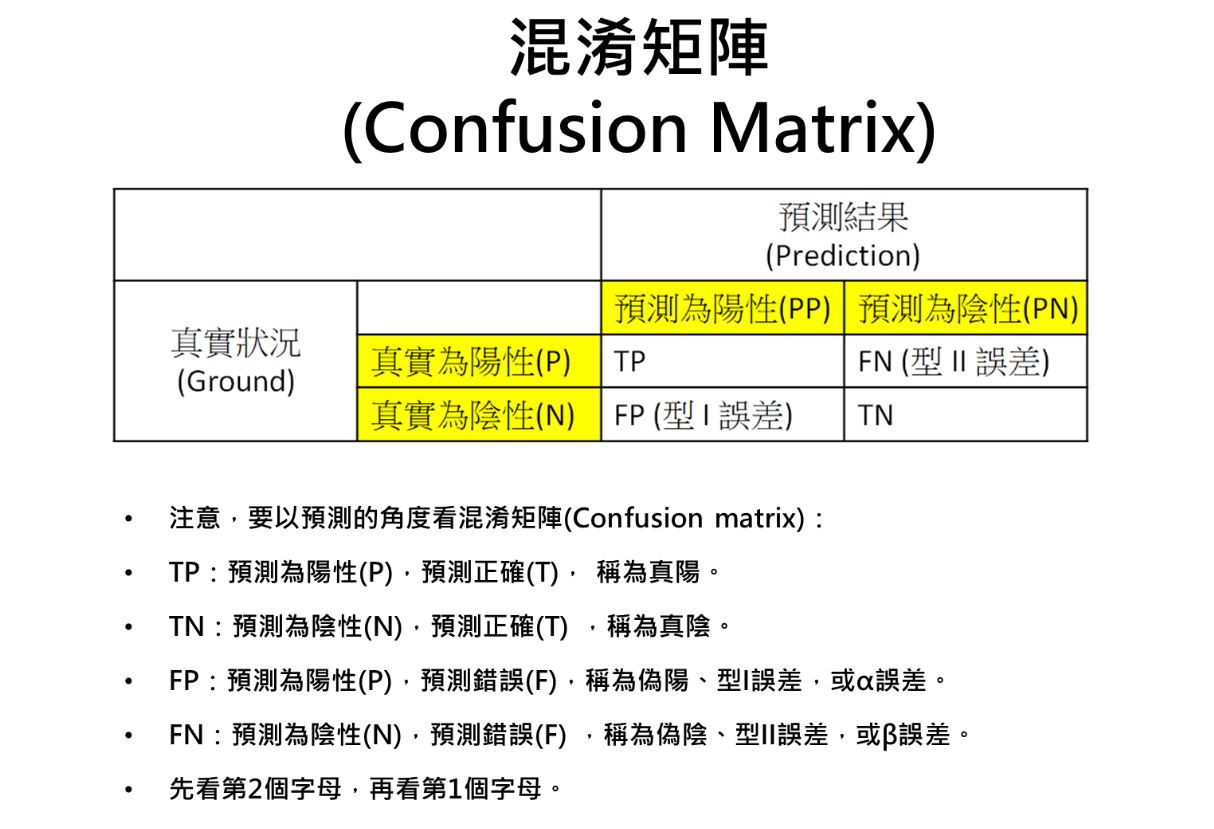

## 假設有8筆資料 [0, 0, 0, 1, 1, 1, 1, 1]
## 模型預測結果為[0, 1, 0, 1, 0, 1, 0, 1]
## 請先以人工計算混淆矩陣，再撰寫程式計算/繪製混淆矩陣。


### 混淆矩陣 (Confusion Matrix)

| 實際狀況 (Ground)    | 預測為陽性 (PP)    | 預測為陰性 (PN)    |
|----------------------|--------------------|--------------------|
| **真實為陽性 (P)**   | TP (真陽性)  3      | FN (假陰性)2        |
| **真實為陰性 (N)**   | FP (假陽性)   1     | TN (真陰性) 2       |

**註解：**
- **TP (真陽性)**：模型正確預測為陽性
- **FN (假陰性)**：模型錯誤預測為陰性（實際為陽性）
- **FP (假陽性)**：模型錯誤預測為陽性（實際為陰性）
- **TN (真陰性)**：模型正確預測為陰性